In [1]:
from harness import Harness
import pandas
from harness.ext import HarnessExtension

In [2]:
class NetworkXMixin:
    graph = None

class NetworkX(HarnessExtension):
    imports = 'networkx'
    mixin = NetworkXMixin
    
    def keywords(self, dataframe):
        return {
            'G': lambda: dataframe.graph,
            'df': lambda: dataframe,
        }
    
    def to_graph(self, source, target, edge_attr=True, df=None):
        df.graph = self.module_.from_pandas_dataframe(
            df, source, target, edge_attr
        )
        return df.graph
    
    def callback(self, dataframe, value):
        if isinstance(value, self.module_.Graph):
            return dataframe
        return value
    
    def edges(self, df):
        return df.graph.edges()
    
    def nodes(self, df):
        return df.graph.nodes()
        

In [3]:
extensions = [
    'harness.ext.base.JinjaExtension',
    'harness.ext.SciKit.SciKitExtension', 
    'harness.ext.Bokeh.BokehModelsExtension',     
    'harness.ext.Bokeh.BokehPlottingExtension',
    'harness.ext.Bokeh.BokehChartsExtension',
    '__main__.NetworkX'
]

In [4]:
df = Harness(pandas.np.random.randn(10,2), extensions=extensions)

Object `model_selection.ShuffleSplit` not found.


In [5]:


df.to_graph(source=0, target=1)

,0,1
0,-0.060750,-0.253790
1,-1.026685,0.326553
2,-1.387309,0.005045
3,-0.067928,0.373072
4,0.153534,-0.596945
5,-0.617026,-0.519781
6,2.059311,-0.559121
7,-0.026931,-0.741157
8,-1.567538,-0.636204
9,0.808769,-1.187760


In [6]:
df.to_graph(0, 1).edges()

[(-0.25379047725131842, -0.060750239618377715),
 (0.37307240107073508, -0.067927526155789217),
 (2.0593112930961932, -0.55912094661579947),
 (-1.1877600695552708, 0.80876927114852271),
 (-0.59694524616655542, 0.15353449812531977),
 (-0.0269310078729127, -0.74115696564660605),
 (-0.6362040599004043, -1.5675378314053467),
 (0.0050445278433665589, -1.3873086162090338),
 (0.32655290372139034, -1.0266854323813419),
 (-0.61702578953163578, -0.51978096698163345)]

In [7]:
Harness(df.spring_layout()).transpose().sample(2)

,0,1
-0.519781,0.026763,0.668988
0.326553,0.958579,0.271178


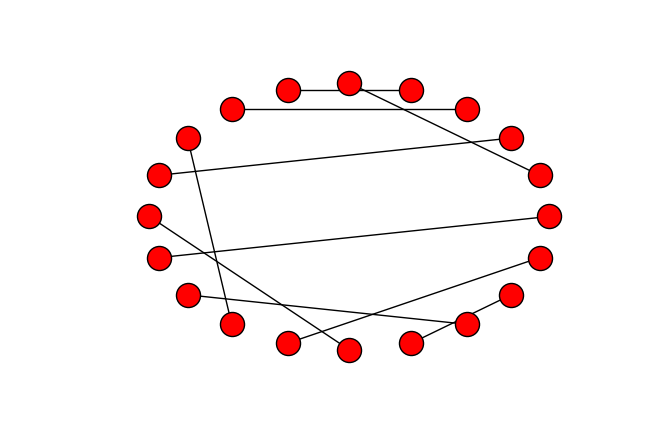

In [8]:
%matplotlib inline
df.draw_circular()